In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import jinja2

In [2]:
df = pd.read_csv('train.csv')
df.shape

(1460, 81)

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df1 = df.drop('Id',axis=1)
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
un = pd.DataFrame(df1.nunique())
un

,0
MSSubClass,15
MSZoning,5
LotFrontage,110
LotArea,1073
Street,2
...,...
MoSold,12
YrSold,5
SaleType,9
SaleCondition,6


viewing in variable explorer

In [6]:
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df1.shape

(1460, 80)

In [8]:
categorical = [var for var in df1.columns if df1[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
if len(categorical)>=1:
    print('The categorical variables :', categorical)

There are 43 categorical variables

The categorical variables : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [9]:
numerical = [var for var in df1.columns if df1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
if len(numerical)>1:
    print('The numerical variables :', numerical)

There are 37 numerical variables

The numerical variables : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


array([[<AxesSubplot: title={'center': 'MSSubClass'}>,
        <AxesSubplot: title={'center': 'LotFrontage'}>,
        <AxesSubplot: title={'center': 'LotArea'}>,
        <AxesSubplot: title={'center': 'OverallQual'}>,
        <AxesSubplot: title={'center': 'OverallCond'}>,
        <AxesSubplot: title={'center': 'YearBuilt'}>],
       [<AxesSubplot: title={'center': 'YearRemodAdd'}>,
        <AxesSubplot: title={'center': 'MasVnrArea'}>,
        <AxesSubplot: title={'center': 'BsmtFinSF1'}>,
        <AxesSubplot: title={'center': 'BsmtFinSF2'}>,
        <AxesSubplot: title={'center': 'BsmtUnfSF'}>,
        <AxesSubplot: title={'center': 'TotalBsmtSF'}>],
       [<AxesSubplot: title={'center': '1stFlrSF'}>,
        <AxesSubplot: title={'center': '2ndFlrSF'}>,
        <AxesSubplot: title={'center': 'LowQualFinSF'}>,
        <AxesSubplot: title={'center': 'GrLivArea'}>,
        <AxesSubplot: title={'center': 'BsmtFullBath'}>,
        <AxesSubplot: title={'center': 'BsmtHalfBath'}>],
     

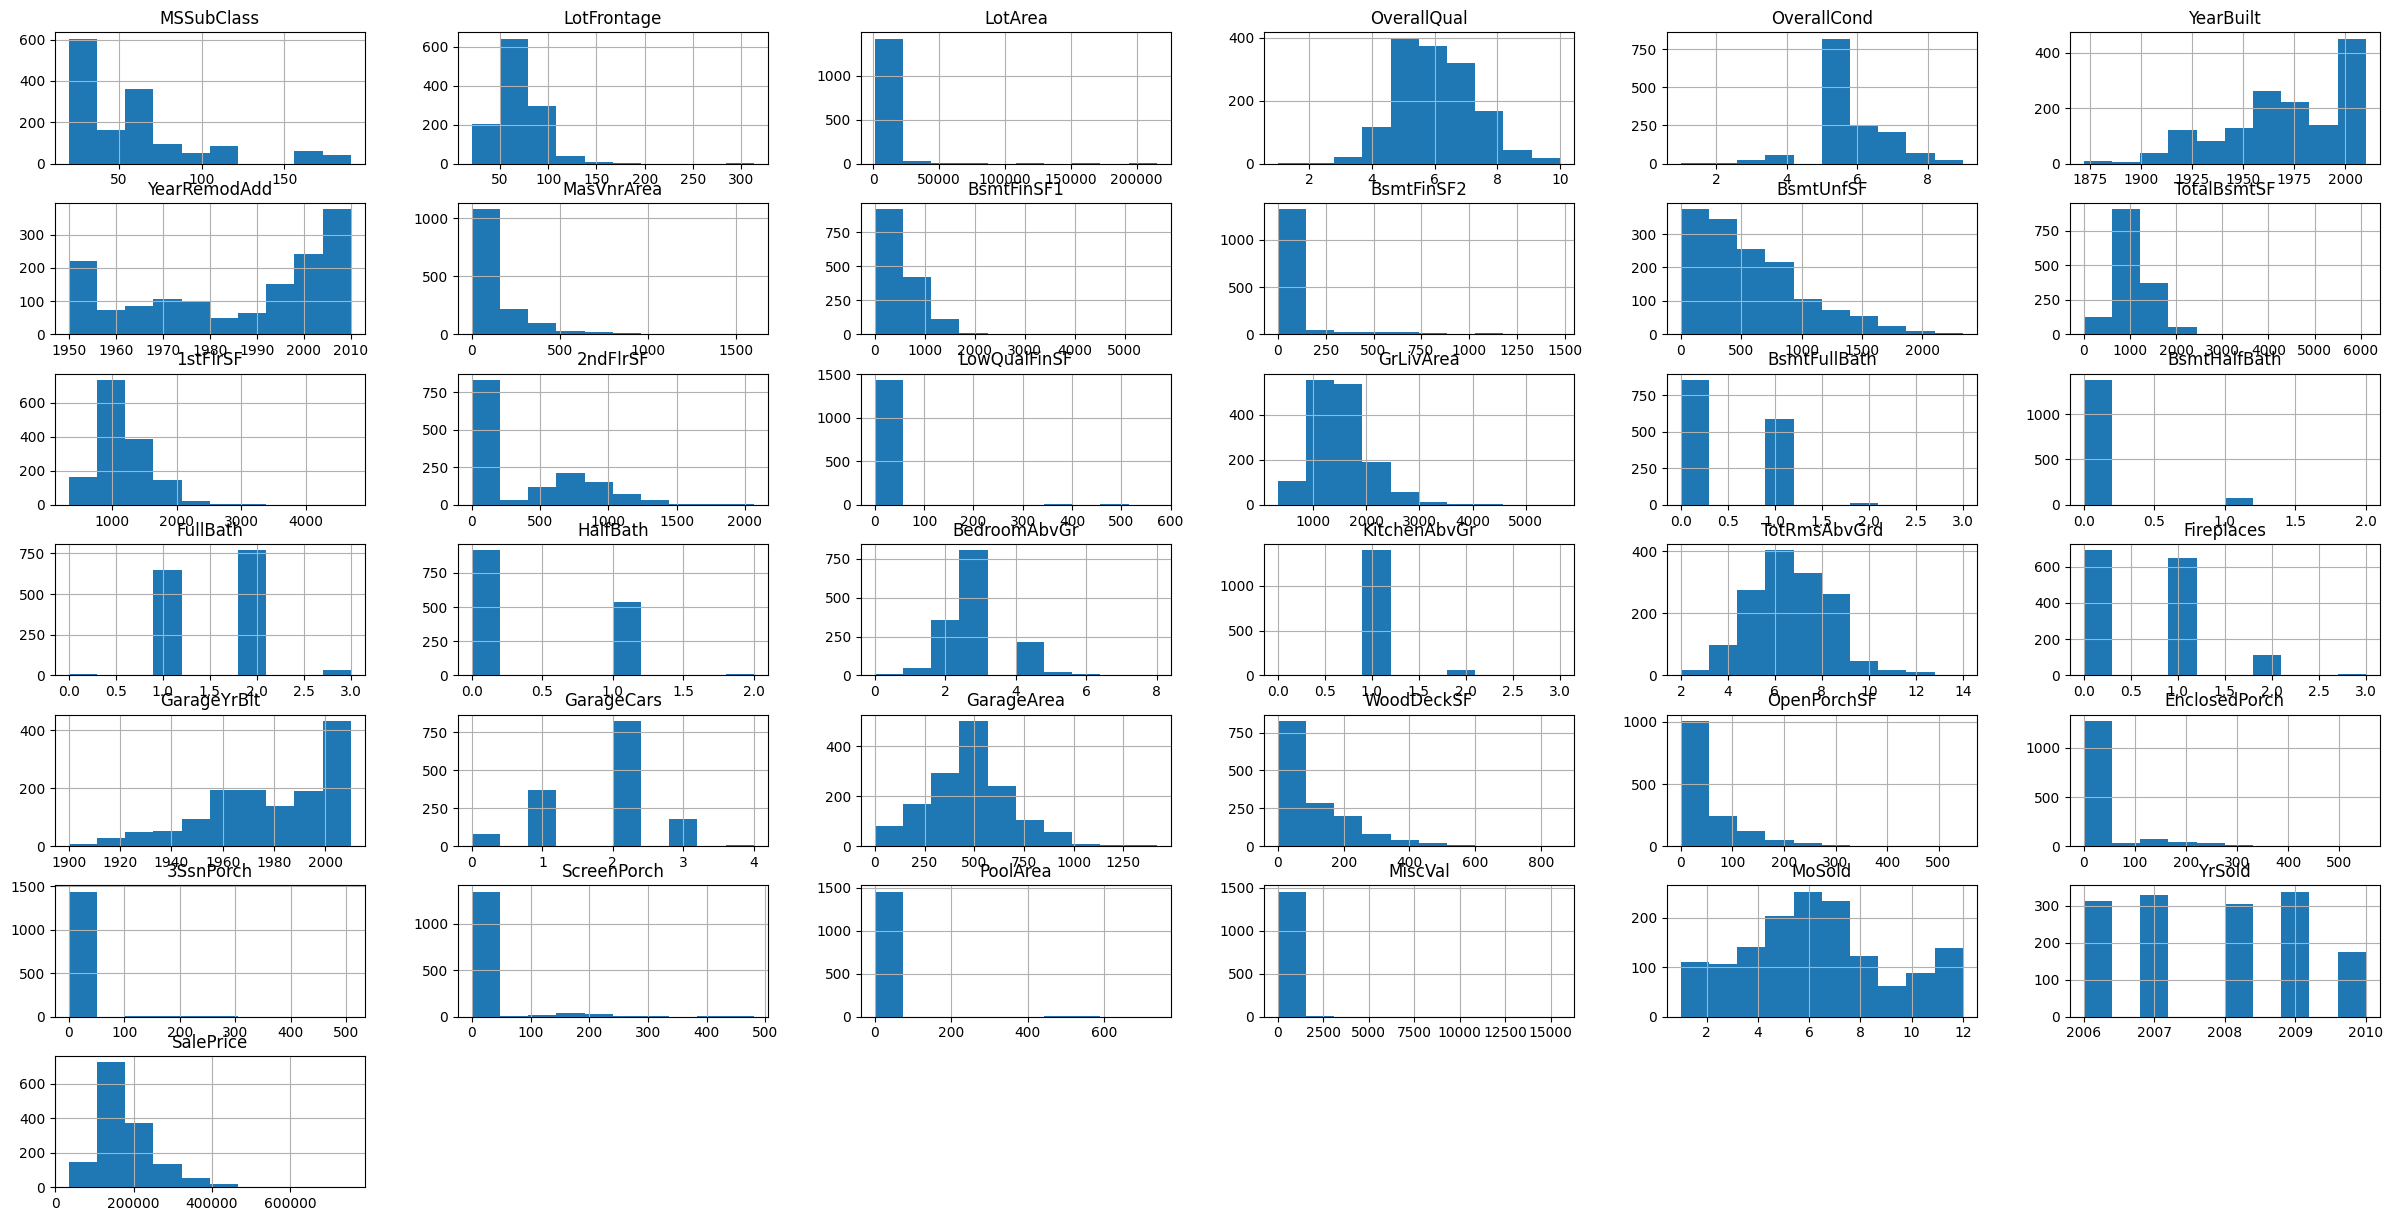

In [10]:
df1[numerical].hist(figsize=(30,15))

In [11]:
nu = pd.DataFrame(df1[numerical].isnull().sum())

In [12]:
nu_cat =pd.DataFrame(df1[categorical].isnull().sum())

array([[<AxesSubplot: title={'center': 'MSSubClass'}>,
        <AxesSubplot: title={'center': 'LotFrontage'}>,
        <AxesSubplot: title={'center': 'LotArea'}>,
        <AxesSubplot: title={'center': 'OverallQual'}>,
        <AxesSubplot: title={'center': 'OverallCond'}>,
        <AxesSubplot: title={'center': 'YearBuilt'}>],
       [<AxesSubplot: title={'center': 'YearRemodAdd'}>,
        <AxesSubplot: title={'center': 'MasVnrArea'}>,
        <AxesSubplot: title={'center': 'BsmtFinSF1'}>,
        <AxesSubplot: title={'center': 'BsmtFinSF2'}>,
        <AxesSubplot: title={'center': 'BsmtUnfSF'}>,
        <AxesSubplot: title={'center': 'TotalBsmtSF'}>],
       [<AxesSubplot: title={'center': '1stFlrSF'}>,
        <AxesSubplot: title={'center': '2ndFlrSF'}>,
        <AxesSubplot: title={'center': 'LowQualFinSF'}>,
        <AxesSubplot: title={'center': 'GrLivArea'}>,
        <AxesSubplot: title={'center': 'BsmtFullBath'}>,
        <AxesSubplot: title={'center': 'BsmtHalfBath'}>],
     

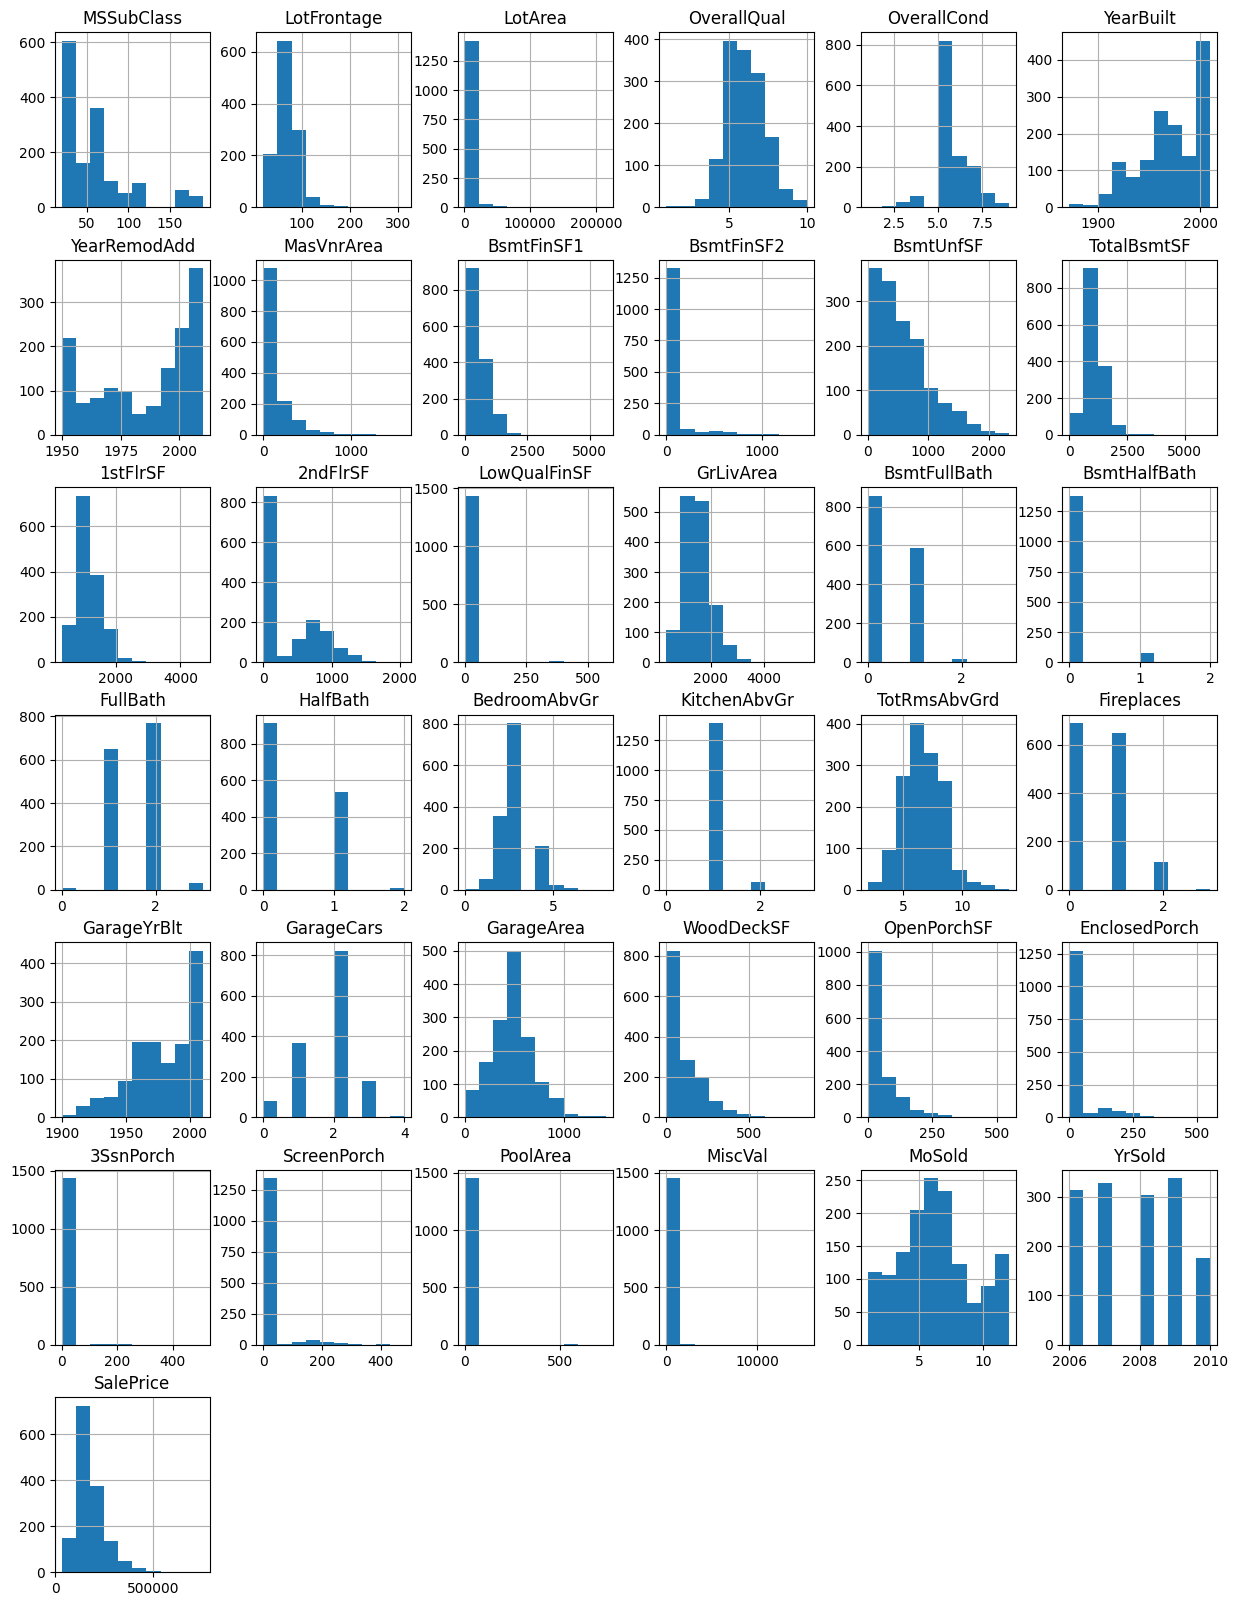

In [13]:
df1.hist(figsize=(15,20))

Lotfrontage -> median

In [14]:
df1.LotFrontage.fillna(df1.LotFrontage.median(), inplace=True)

categorical vars na

Alley, bsmtqual, bsmtcond, bsmtexp, fintyp1, fintype2, electrical, fireplacequ, garage - type, finish qual, cond, , poolqc, fence,misc_feature

In [15]:
df1.MasVnrType.value_counts(dropna=False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [16]:
df1.MasVnrType.fillna(df1.MasVnrType.mode()[0], inplace=True)
df1.MasVnrArea.fillna(0, inplace=True)

garage

In [17]:
df1.GarageType.value_counts(dropna=False)

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [18]:
df1.GarageType.fillna('None', inplace=True)
# df1.GarageArea.fillna(0, inplace=True)
df1.GarageYrBlt.fillna(df1.YearBuilt, inplace=True)
df1.GarageType.fillna('None', inplace=True)
df1.GarageFinish.fillna('None', inplace=True)
df1.GarageQual.fillna('None', inplace=True)
df1.GarageCond.fillna('None', inplace=True)

BSMT

In [19]:
df1.TotalBsmtSF.value_counts()

0       37
864     35
672     17
912     15
1040    14
        ..
1838     1
1581     1
707      1
611      1
1542     1
Name: TotalBsmtSF, Length: 721, dtype: int64

37 nulls

In [20]:
df1.BsmtQual.fillna('None', inplace=True)

df1.BsmtCond.fillna('None', inplace=True)

df1.BsmtExposure.fillna('None', inplace=True)

df1.BsmtFinType1.fillna('None', inplace=True)

df1.BsmtFinType2.fillna('None', inplace=True)


Fireplace

In [21]:
df1.Fireplaces.value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [22]:
df1.FireplaceQu.value_counts(dropna=False)

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

690 nulls

In [23]:
df1.FireplaceQu.fillna('None', inplace=True)

In [24]:
df1.MiscFeature.fillna('None', inplace=True)
df1.Fence.fillna('None', inplace=True)
df1.PoolQC.fillna('None', inplace=True)

In [25]:
df1.shape

(1460, 80)

In [26]:
df1.Electrical.value_counts(dropna=False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [27]:
df1.Electrical.fillna(df1.Electrical.mode()[0], inplace=True)

In [28]:
df1.Electrical.value_counts(dropna=False)

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

Alley

In [29]:
df1.Alley.fillna('None',inplace=True)

In [30]:
df1.isnull().values.any()

False

Done with null handling!

In [31]:
df1.shape

(1460, 80)

In [32]:
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

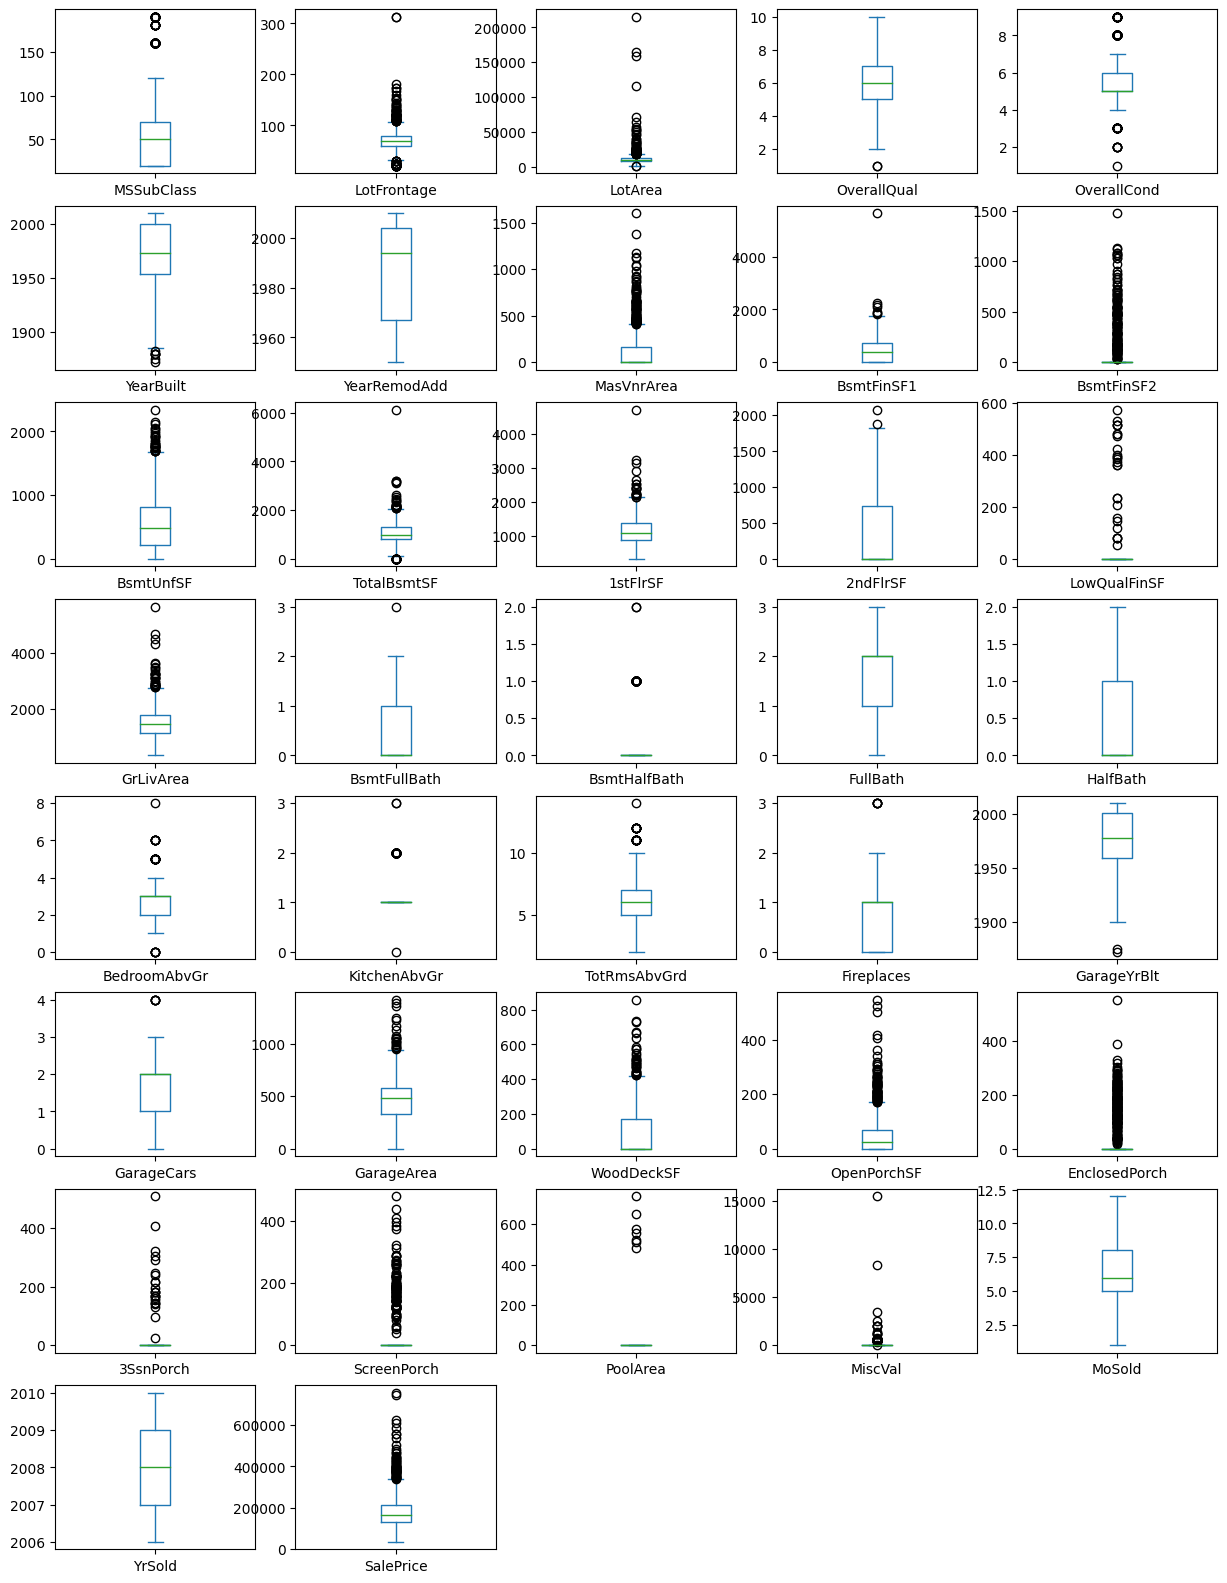

In [34]:
df1[numerical].plot(kind = "box",subplots = True,layout = (8,5),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

In [35]:
rem_list = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF'
                        ,'1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','GarageArea'
                        ,'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']

In [36]:
#Using the InterQuartile Range to fill the values
def remove_outlier(i , col):
    Q1 = i[col].quantile(0.25)
    Q3 = i[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df1[col] = np.clip(i[col] , lower_whisker , upper_whisker)
    return i

def treat_outliers_all(df , col_list):
    for c in col_list:
        i = remove_outlier(df , c)
    return i

In [37]:
df2 = treat_outliers_all(df1 , rem_list)

In [38]:
df2.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,...,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0,1460.000000,1460.000000,1460.000000
mean,56.897260,69.090411,9647.388014,6.099315,5.575342,1971.267808,1984.865753,89.406336,439.997517,0.0,...,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0,6.321918,2007.815753,180921.195890
std,42.300571,17.231909,3594.356399,1.382997,1.112799,30.202904,20.645407,134.017553,433.219435,0.0,...,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0,2.703626,1.328095,79442.502883
min,20.000000,31.500000,1481.500000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.0,...,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.0,...,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,214000.000000
max,190.000000,107.500000,17673.500000,10.000000,9.000000,2010.000000,2010.000000,410.625000,1780.625000,0.0,...,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,755000.000000


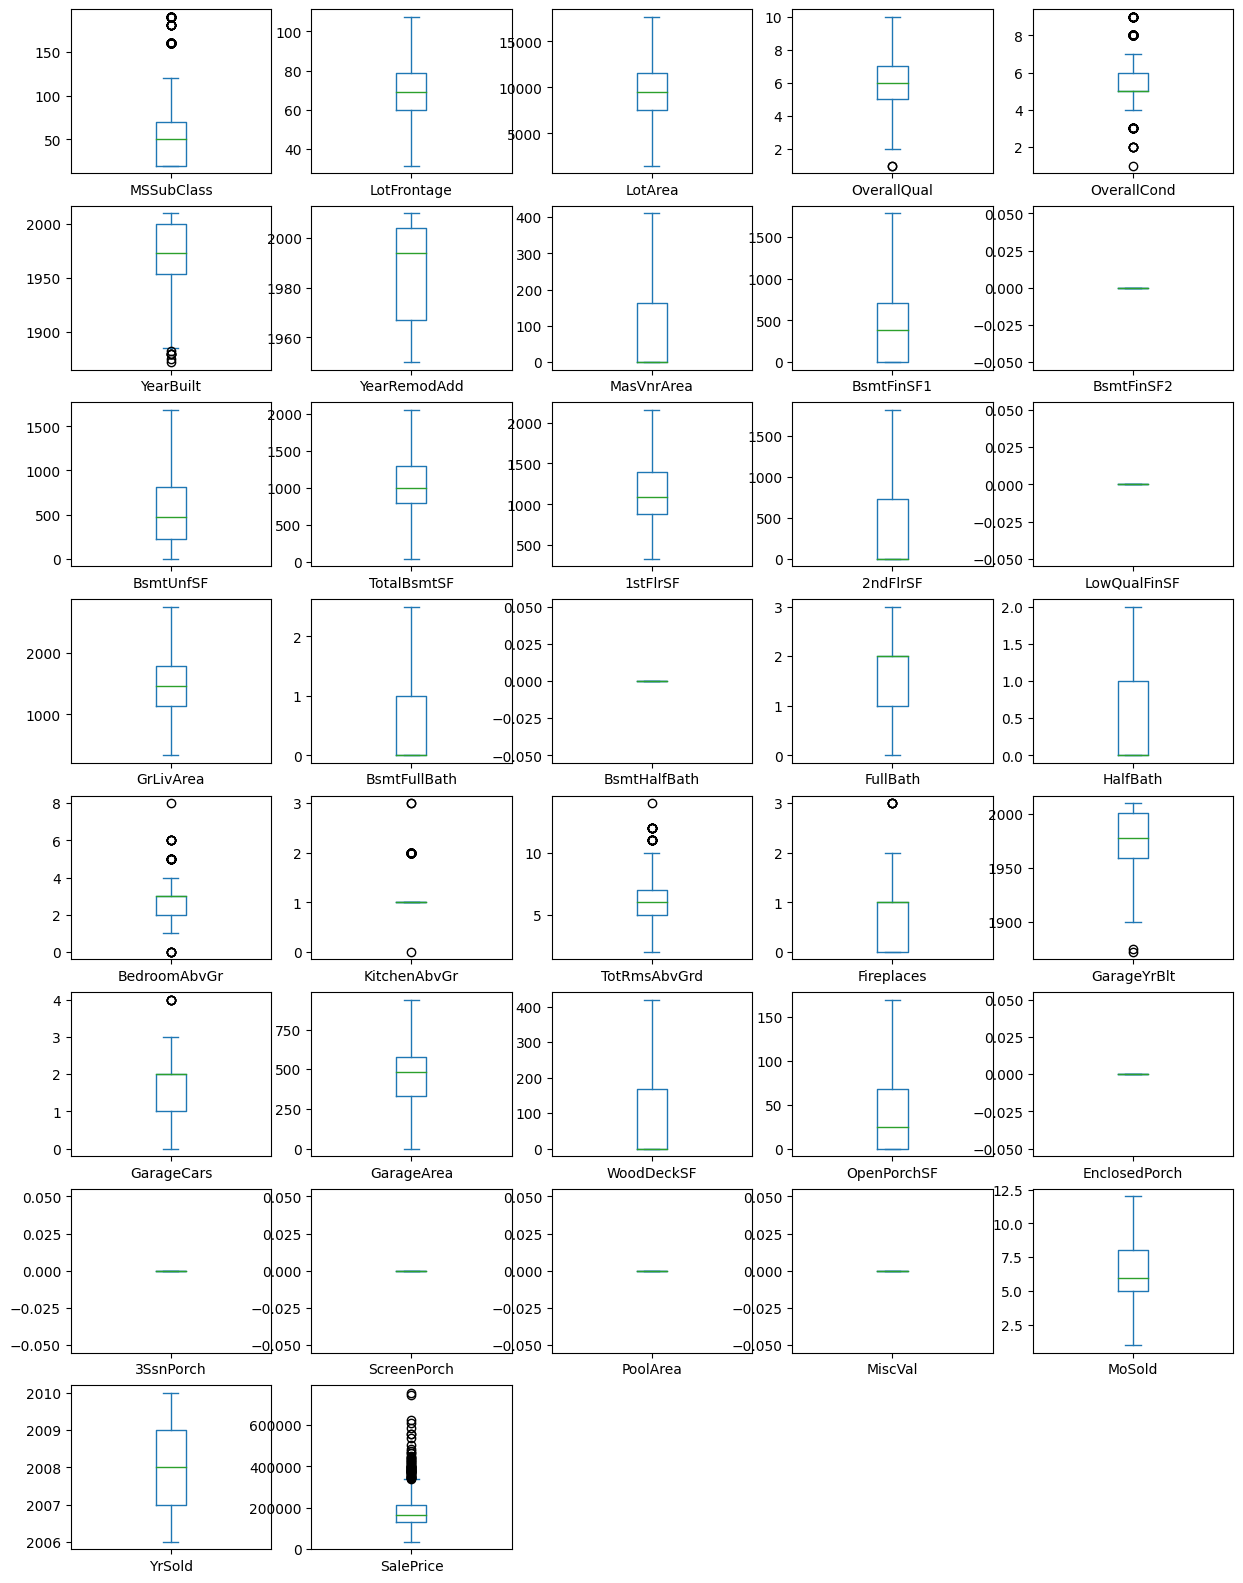

In [39]:
df2[numerical].plot(kind = "box",subplots = True,layout = (8,5),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

In [40]:
df3 = pd.get_dummies(data = df2, columns=df2[categorical].columns,drop_first=True)

In [41]:
df3.isnull().values.any()

False

In [42]:
df3.OverallQual=df3.OverallQual.astype('category')
df3.OverallCond=df3.OverallCond.astype('category')
df3.MSSubClass=df3.MSSubClass.astype('category')

In [43]:
df2.shape, df3.shape

((1460, 80), (1460, 260))

Generating one without Outlier Removals!

In [44]:
df4 = pd.get_dummies(data = df1, columns=df1[categorical].columns,drop_first=True)

In [45]:
df4.shape

(1460, 260)

In [46]:
df4.isnull().values.any()

False

In [47]:
df4.OverallQual=df4.OverallQual.astype('category')
df4.OverallCond=df4.OverallCond.astype('category')
df4.MSSubClass=df4.MSSubClass.astype('category')

Feature Engineering

In [157]:
X = df3.drop(['SalePrice'],axis=1)
y = df3.SalePrice

X.shape, y.shape

((1460, 259), (1460,))

In [158]:
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 259), (292, 259), (1168,), (292,))

In [50]:
from sklearn.linear_model import LinearRegression

# initialize the linear regression model
reg = LinearRegression()

# Train the model with our training data
reg.fit(X_train, y_train)

LinearRegression()

In [51]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [52]:
y_pred_lin = reg.predict(X_test)

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_ln = mean_absolute_error(y_test,y_pred_lin)
rmse_ln = sqrt(mean_squared_error(y_test,y_pred_lin))
r_sq_ln = r2_score(y_test,y_pred_lin)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_ln,3),round(rmse_ln,3),round(r_sq_ln,3)))

Mean Absolute Error: 19888.406
Root Mean Square Error: 37921.067
R2 Score: 0.813


Random Forests

In [159]:
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
scaler = MinMaxScaler()
X_train_RF = scaler.fit_transform(X_train)
X_test_RF = scaler.transform(X_test)

X_train_RF = pd.DataFrame(X_train_RF,columns=cols)
X_test_RF = pd.DataFrame(X_test_RF,columns=cols)

In [160]:
X_train_RF.shape, X_test_RF.shape

((1168, 259), (292, 259))

In [56]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train_RF,y_train)

RandomForestRegressor(n_estimators=10)

In [57]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [58]:
y_pred_RF = rf.predict(X_test_RF)

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_rf = mean_absolute_error(y_test,y_pred_RF)
rmse_rf = sqrt(mean_squared_error(y_test,y_pred_RF))
r_sq_rf = r2_score(y_test,y_pred_RF)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_rf,3),round(rmse_rf,3),round(r_sq_rf,3)))

Mean Absolute Error: 19294.902
Root Mean Square Error: 30050.532
R2 Score: 0.882


With 100 trees

In [60]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_RF,y_train)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [61]:
y_pred_RF_100 = rf.predict(X_test_RF)
# print(y_pred_RF_100)

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_rf100 = mean_absolute_error(y_test,y_pred_RF_100)
rmse_rf100 = sqrt(mean_squared_error(y_test,y_pred_RF_100))
r_sq_rf100 = r2_score(y_test,y_pred_RF_100)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_rf100,3),round(rmse_rf100,3),round(r_sq_rf100,3)))

Mean Absolute Error: 17481.331
Root Mean Square Error: 28314.417
R2 Score: 0.895


In [241]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {
    'n_estimators': [100, 150, 200, 250, 300,500,1000],
    'max_depth': [10, 20, None],
    'bootstrap':[True],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10]
}
regr = RandomForestRegressor(random_state=12)

clf = GridSearchCV(regr, parameters,verbose=10,n_jobs=6,cv=3)
clf.fit(X_train_RF, y_train)
print("Best params: ", clf.best_params_)

Fitting 3 folds for each of 189 candidates, totalling 567 fits
Best params:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [242]:
y_pred_RF_cv = clf.predict(X_test_RF)
# print(y_pred_RF_100)

In [243]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_rfcv = mean_absolute_error(y_test,y_pred_RF_cv)
rmse_rfcv = sqrt(mean_squared_error(y_test,y_pred_RF_cv))
r_sq_rfcv = r2_score(y_test,y_pred_RF_cv)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_rfcv,3),round(rmse_rfcv,3),round(r_sq_rfcv,3)))

Mean Absolute Error: 17333.661
Root Mean Square Error: 28480.173
R2 Score: 0.894


Catboost

In [71]:
from catboost import CatBoostRegressor

cat_clf_5 = CatBoostRegressor(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)


cat_clf_5.fit(X_train_RF, y_train,
        eval_set=(X_test_RF, y_test), 
        verbose=5
)

print('CatBoost model is fitted: ' + str(cat_clf_5.is_fitted()))
print('CatBoost model parameters:')
print(cat_clf_5.get_params())

0:	learn: 72120.6478091	test: 82103.6583992	best: 82103.6583992 (0)	total: 2.52ms	remaining: 10.1ms
4:	learn: 57284.6633403	test: 66580.5032048	best: 66580.5032048 (4)	total: 13.9ms	remaining: 0us

bestTest = 66580.5032
bestIteration = 4

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 5, 'learning_rate': 0.1, 'loss_function': 'RMSE'}


In [72]:
print('Training set score: {:.4f}'.format(cat_clf_5.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(cat_clf_5.score(X_test_RF, y_test)))

Training set score: 0.4498
Test set score: 0.4221


In [74]:
from catboost import CatBoostRegressor
cat_clf_10 = CatBoostRegressor(
    iterations=10,
     verbose=5,
)

cat_clf_10.fit(
    X_train_RF, y_train,
    
    eval_set=(X_test_RF, y_test),
)

Learning rate set to 0.5
0:	learn: 53982.9395100	test: 62538.1606797	best: 62538.1606797 (0)	total: 2.68ms	remaining: 24.1ms
5:	learn: 26404.0369685	test: 31976.2597704	best: 31976.2597704 (5)	total: 16.3ms	remaining: 10.9ms
9:	learn: 23252.2771730	test: 29876.7580583	best: 29876.7580583 (9)	total: 27.7ms	remaining: 0us

bestTest = 29876.75806
bestIteration = 9



In [76]:
print('Training set score: {:.4f}'.format(cat_clf_10.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(cat_clf_10.score(X_test_RF, y_test)))

Training set score: 0.9094
Test set score: 0.8836


In [106]:
from catboost import CatBoostRegressor
cat_clf_final = CatBoostRegressor(
    iterations=900,
     verbose=5,
)

cat_clf_final.fit(
    X_train_RF, y_train,
    
    eval_set=(X_test_RF, y_test),
)

print('CatBoost model is fitted: ' + str(cat_clf_final.is_fitted()))
print('CatBoost model parameters:')
print(cat_clf_final.get_params())

Learning rate set to 0.055641
0:	learn: 74367.1510450	test: 84527.8923330	best: 84527.8923330 (0)	total: 2.54ms	remaining: 2.28s
5:	learn: 62996.2659975	test: 72704.1049368	best: 72704.1049368 (5)	total: 17.4ms	remaining: 2.59s
10:	learn: 54078.2836584	test: 63160.9228439	best: 63160.9228439 (10)	total: 32.6ms	remaining: 2.63s
15:	learn: 47184.8227269	test: 55856.2008040	best: 55856.2008040 (15)	total: 47.1ms	remaining: 2.6s
20:	learn: 41977.3841025	test: 50476.4176800	best: 50476.4176800 (20)	total: 61.2ms	remaining: 2.56s
25:	learn: 37981.5935792	test: 46192.2381741	best: 46192.2381741 (25)	total: 74.8ms	remaining: 2.52s
30:	learn: 34798.1288514	test: 42955.1322160	best: 42955.1322160 (30)	total: 89.6ms	remaining: 2.51s
35:	learn: 32342.0700622	test: 40225.7764669	best: 40225.7764669 (35)	total: 104ms	remaining: 2.48s
40:	learn: 30363.1446803	test: 38442.4465875	best: 38442.4465875 (40)	total: 118ms	remaining: 2.48s
45:	learn: 28423.3366000	test: 36526.2459305	best: 36526.2459305 (45

In [107]:
print('Training set score: {:.4f}'.format(cat_clf_final.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(cat_clf_final.score(X_test_RF, y_test)))

Training set score: 0.9941
Test set score: 0.9200


In [111]:
y_pred_cat = cat_clf_final.predict(X_test_RF)

In [112]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_cat_clf = mean_absolute_error(y_test,y_pred_cat)
rmse_cat_clf = sqrt(mean_squared_error(y_test,y_pred_cat))
r_sq_cat_clf = r2_score(y_test,y_pred_cat)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_cat_clf,3),round(rmse_cat_clf,3),round(r_sq_cat_clf,3)))

Mean Absolute Error: 15577.465
Root Mean Square Error: 24778.531
R2 Score: 0.92


LGBM

In [161]:
# build the lightgbm model
import lightgbm as lgb
lgbm_clf = lgb.LGBMRegressor()
lgbm_clf.fit(X_train_RF, y_train)

LGBMRegressor()

In [162]:
print('Training set score: {:.4f}'.format(lgbm_clf.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(lgbm_clf.score(X_test_RF, y_test)))

Training set score: 0.9756
Test set score: 0.8904


In [169]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

param_grid = {
              "n_estimators": [1, 2,10,25,50,100,200,500,700,1000,1500,2000]
             }



LGB = lgb.LGBMRegressor(random_state=11)
#using decision tree as base

# run grid search
grid_search_ABC = GridSearchCV(LGB, param_grid=param_grid,verbose=10, cv=3,n_jobs=6)

grid_search_ABC.fit(X_train_RF,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=LGBMRegressor(random_state=11), n_jobs=6,
             param_grid={'n_estimators': [1, 2, 10, 25, 50, 100, 200, 500, 700,
                                          1000, 1500, 2000]},
             verbose=10)

In [170]:
print('Training set score: {:.4f}'.format(grid_search_ABC.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(grid_search_ABC.score(X_test_RF, y_test)))

Training set score: 0.9756
Test set score: 0.8904


In [171]:
y_pred_lgbm = grid_search_ABC.predict(X_test_RF)

In [172]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_lgbm = mean_absolute_error(y_test,y_pred_lgbm)
rmse_lgbm = sqrt(mean_squared_error(y_test,y_pred_lgbm))
r_sq_lgbm = r2_score(y_test,y_pred_lgbm)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_lgbm,3),round(rmse_lgbm,3),round(r_sq_lgbm,3)))

Mean Absolute Error: 16719.468
Root Mean Square Error: 28997.882
R2 Score: 0.89


XGBoost

In [214]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {
    'n_estimators': [100, 150, 200, 250, 300,500,1000],
    'booster':['gbtree'],
    'max_depth':[3,4,5,6,7,8,9,10],
    'eta':[0.01,0.05,0.1,0.15,0.2]
}
xgb = xgb.XGBRegressor(random_state=10)
xgb_clf = GridSearchCV(xgb,param_grid=parameters,verbose=2,n_jobs=6,cv=3)
xgb_clf.fit(X_train_RF,y_train)
print("Best params: ", xgb_clf.best_params_)

Fitting 3 folds for each of 280 candidates, totalling 840 fits
Best params:  {'booster': 'gbtree', 'eta': 0.1, 'max_depth': 3, 'n_estimators': 500}


In [215]:
y_pred_xgb = xgb_clf.predict(X_test_RF)

In [216]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_xgb = mean_absolute_error(y_test,y_pred_xgb)
rmse_xgb = sqrt(mean_squared_error(y_test,y_pred_xgb))
r_sq_xgb = r2_score(y_test,y_pred_xgb)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_xgb,3),round(rmse_xgb,3),round(r_sq_xgb,3)))

Mean Absolute Error: 16228.942
Root Mean Square Error: 25144.29
R2 Score: 0.918


ANN

In [113]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold, train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf

In [114]:
rent_model = Sequential()
rent_model.add(Dense(256, input_shape = (X_train_RF.shape[1],), activation = "relu"))
rent_model.add(Dense(512, activation = "relu"))
rent_model.add(Dense(1024, activation = "relu"))
rent_model.add(Dropout(0.2))
rent_model.add(Dense(1024, activation = "relu"))
rent_model.add(Dense(512, activation = "relu"))
rent_model.add(Dense(256, activation = "relu"))
rent_model.add(Flatten())
rent_model.add(Dense(512, activation = "relu"))
rent_model.add(Dropout(0.5))
rent_model.add(Dense(512, activation = "relu"))
rent_model.add(Dropout(0.5))
rent_model.add(Dense(1, activation = "linear",kernel_regularizer = tf.keras.regularizers.l1(l=0.001)))
rent_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               66560     
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 256)               1

In [115]:
optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Compile the network :
rent_model.compile(optimizer=optimizer, loss=tf.keras.losses.MAE, metrics=[tf.keras.metrics.MAE])

In [116]:
m_loss = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [117]:
save_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='rent_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

In [118]:
history=rent_model.fit(X_train_RF, y_train, epochs=100,validation_split=0.2, batch_size=64, verbose=1,callbacks=[m_loss,save_checkpoint])

Epoch 1/100


c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1508: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


 1/15 [=>............................] - ETA: 30s - loss: 164965.9688 - mean_absolute_error: 164965.9375
Epoch 1: val_loss improved from inf to 51038.30859, saving model to rent_model.h5
15/15 [==============================] - 2s 22ms/step - loss: 171429.1719 - mean_absolute_error: 171429.1406 - val_loss: 51038.3086 - val_mean_absolute_error: 51038.2812
Epoch 2/100
 1/15 [=>............................] - ETA: 0s - loss: 72101.2500 - mean_absolute_error: 72101.2188
Epoch 2: val_loss improved from 51038.30859 to 37784.30078, saving model to rent_model.h5
15/15 [==============================] - 0s 10ms/step - loss: 67195.7578 - mean_absolute_error: 67195.7188 - val_loss: 37784.3008 - val_mean_absolute_error: 37784.2695
Epoch 3/100
 1/15 [=>............................] - ETA: 0s - loss: 41378.9062 - mean_absolute_error: 41378.8789
Epoch 3: val_loss improved from 37784.30078 to 30345.93945, saving model to rent_model.h5
15/15 [==============================] - 0s 10ms/step - loss: 44204

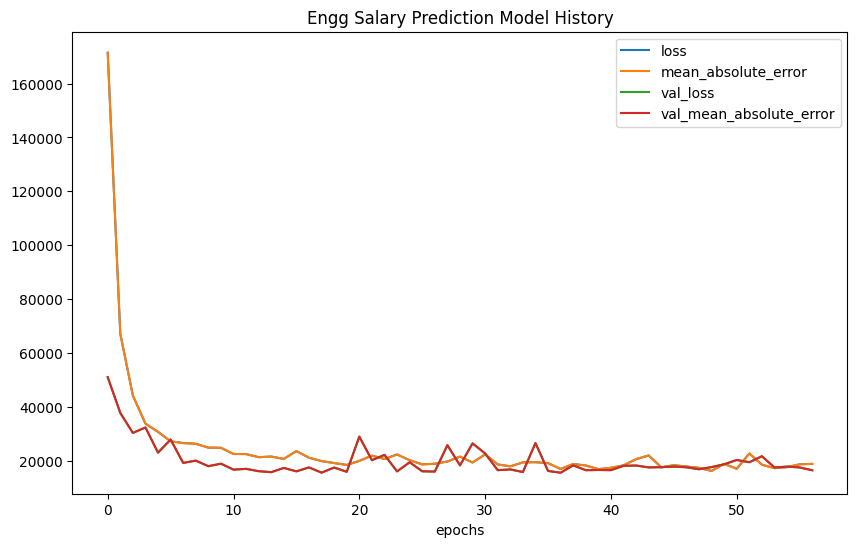

In [119]:
dfh = pd.DataFrame(history.history)
plt.figure(figsize=(10, 6))
plt.title('Engg Salary Prediction Model History')
plt.plot(dfh)
plt.xlabel('epochs')
plt.legend(dfh.columns)
plt.show()

In [120]:
y_pred_cnn = rent_model.predict(X_test_RF)
# print(y_pred_cnn)

10/10 [==============================] - 0s 1ms/step


In [121]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_cnn = mean_absolute_error(y_test,y_pred_cnn)
rmse_cnn = sqrt(mean_squared_error(y_test,y_pred_cnn))
r_sq_cnn = r2_score(y_test,y_pred_cnn)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_cnn,3),round(rmse_cnn,3),round(r_sq_cnn,3)))

Mean Absolute Error: 18310.946
Root Mean Square Error: 28596.585
R2 Score: 0.893


In [218]:
linear_reg_results =  pd.Series({ "MAE": mae_ln, "RMSE": rmse_ln, "R-Square": r_sq_ln }, name="Linear Regression")
rf_10_results = pd.Series({ "MAE": mae_rf, "RMSE": rmse_rf, "R-Square": r_sq_rf }, name="Random Forest-10")
rf_100_results = pd.Series({ "MAE": mae_rf100, "RMSE": rmse_rf100, "R-Square": r_sq_rf100 }, name="Random Forest-100")
rf_cv_results =  pd.Series({ "MAE": mae_rfcv, "RMSE": rmse_rfcv, "R-Square": r_sq_rfcv }, name="Random Forest-CV")
cat_results =  pd.Series({ "MAE": mae_cat_clf, "RMSE": rmse_cat_clf, "R-Square": r_sq_cat_clf }, name="Catboost")
lgbm_results =  pd.Series({ "MAE": mae_lgbm, "RMSE": rmse_lgbm, "R-Square": r_sq_lgbm }, name="LGBM")
xgb_results =  pd.Series({ "MAE": mae_xgb, "RMSE": rmse_xgb, "R-Square": r_sq_xgb }, name="XGB")
cnn_results = pd.Series({ "MAE": mae_cnn, "RMSE": rmse_cnn, "R-Square": r_sq_cnn }, name="CNN")


results = pd.DataFrame([linear_reg_results, rf_10_results, rf_100_results, rf_cv_results, cat_results, lgbm_results ,xgb_results, cnn_results])
results.round(3)

,MAE,RMSE,R-Square
Linear Regression,19888.406,37921.067,0.813
Random Forest-10,19294.902,30050.532,0.882
Random Forest-100,17481.331,28314.417,0.895
Random Forest-CV,17333.661,28480.173,0.894
Catboost,15577.465,24778.531,0.920
LGBM,16719.468,28997.882,0.890
XGB,16228.942,25144.290,0.918
CNN,18310.946,28596.585,0.893


Test dataset!

In [123]:
test_df = pd.read_csv('test.csv')
test_df.shape

(1459, 80)

In [124]:
test_df = test_df.drop('Id',axis=1)
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [125]:
categorical = [var for var in test_df.columns if test_df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
if len(categorical)>=1:
    print('The categorical variables :', categorical)

There are 43 categorical variables

The categorical variables : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [126]:
numerical = [var for var in test_df.columns if test_df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
if len(numerical)>1:
    print('The numerical variables :', numerical)

There are 36 numerical variables

The numerical variables : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [127]:
test_df.LotFrontage.fillna(df1.LotFrontage.median(), inplace=True)

In [128]:
test_df.MasVnrType.fillna(df1.MasVnrType.mode()[0], inplace=True)
test_df.MasVnrArea.fillna(0, inplace=True)

In [129]:
test_df.GarageType.fillna('None', inplace=True)
# test_df.GarageArea.fillna(0, inplace=True)
test_df.GarageYrBlt.fillna(test_df.YearBuilt, inplace=True)
test_df.GarageType.fillna('None', inplace=True)
test_df.GarageFinish.fillna('None', inplace=True)
test_df.GarageQual.fillna('None', inplace=True)
test_df.GarageCond.fillna('None', inplace=True)

In [130]:
test_df.BsmtQual.fillna('None', inplace=True)

test_df.BsmtCond.fillna('None', inplace=True)

test_df.BsmtExposure.fillna('None', inplace=True)

test_df.BsmtFinType1.fillna('None', inplace=True)

test_df.BsmtFinType2.fillna('None', inplace=True)

In [131]:
test_df.FireplaceQu.fillna('None', inplace=True)

In [132]:
test_df.MiscFeature.fillna('None', inplace=True)
test_df.Fence.fillna('None', inplace=True)
test_df.PoolQC.fillna('None', inplace=True)

In [133]:
test_df.Electrical.fillna(df1.Electrical.mode()[0], inplace=True)

In [134]:
test_df.Alley.fillna('None',inplace=True)

In [135]:
nu_test = pd.DataFrame(test_df[numerical].isnull().sum())

In [136]:
nu_cat_test =pd.DataFrame(test_df[categorical].isnull().sum())

In [137]:
test_df.BsmtFinSF1.fillna(df1.BsmtFinSF1.median(), inplace=True)
test_df.BsmtFinSF2.fillna(df1.BsmtFinSF2.median(), inplace=True)

test_df.BsmtUnfSF.fillna(df1.BsmtUnfSF.median(), inplace=True)

test_df.TotalBsmtSF.fillna(df1.TotalBsmtSF.median(), inplace=True)
test_df.FullBath.fillna(df1.FullBath.median(), inplace=True)
test_df.HalfBath.fillna(df1.HalfBath.median(), inplace=True)
test_df.BsmtFullBath.fillna(df1.BsmtFullBath.mode()[0], inplace=True)
test_df.BsmtHalfBath.fillna(df1.BsmtHalfBath.mode()[0], inplace=True)
test_df.GarageCars.fillna(df1.GarageCars.mode()[0], inplace=True)
test_df.GarageArea.fillna(df1.GarageArea.median(), inplace=True)

In [138]:
test_df.MSZoning.fillna(df1.MSZoning.mode()[0], inplace=True)
test_df.Utilities.fillna(df1.Utilities.mode()[0], inplace=True)
test_df.Exterior1st.fillna(df1.Exterior1st.mode()[0], inplace=True)
test_df.Exterior2nd.fillna(df1.Exterior2nd.mode()[0], inplace=True)
test_df.KitchenQual.fillna(df1.KitchenQual.mode()[0], inplace=True)
test_df.Functional.fillna(df1.Functional.mode()[0], inplace=True)
test_df.SaleType.fillna(df1.SaleType.mode()[0], inplace=True)

In [139]:
test_df.isnull().values.any()

False

In [140]:
test_df.shape

(1459, 79)

In [141]:
test_df_2 = treat_outliers_all(test_df,rem_list)

In [142]:
test_df_2.shape

(1459, 79)

In [143]:
test_df_3 = pd.get_dummies(data = test_df_2, columns=df1[categorical].columns,drop_first=True)

In [144]:
test_df_3.OverallQual=test_df_3.OverallQual.astype('category')
test_df_3.OverallCond=test_df_3.OverallCond.astype('category')
test_df_3.MSSubClass=test_df_3.MSSubClass.astype('category')

In [145]:
test_df_3.shape

(1459, 241)

In [146]:
# Get missing columns in the training test
missing_cols = set( X_test.columns ) - set( test_df_3.columns )
# Add a missing column in test_df_3 set with default value equal to 0
for c in missing_cols:
    test_df_3[c] = 0
# Ensure the order of column in the test_df_3 set is in the same order than in train set
test_df_3 = test_df_3[X_test.columns]

In [147]:
test_df_3.shape

(1459, 259)

RF

Training on full data with gridsearch params

'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300

In [88]:
from sklearn.preprocessing import MinMaxScaler

cols = X.columns
scaler = MinMaxScaler()
X_train_RF = scaler.fit_transform(X)


X_train_RF = pd.DataFrame(X_train_RF,columns=cols)


In [89]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(bootstrap=True, max_depth= 20, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 300)
rf.fit(X_train_RF,y)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 20,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [90]:
X_test_RF = scaler.transform(test_df_3)
X_test_RF = pd.DataFrame(X_test_RF,columns=cols)

In [92]:
y_pred_RF_gs_cv = rf.predict(X_test_RF)
# print(y_pred_RF_100)

In [93]:
pd.DataFrame(y_pred_RF_gs_cv).to_csv('pred_rfcv-fulldata.csv')

RF_CV

Catboost preds

In [219]:
X_test_df_RF = scaler.transform(test_df_3)
X_test_df_RF = pd.DataFrame(X_test_df_RF,columns=cols)

In [220]:
sample = pd.read_csv('sample_submission.csv')
sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [226]:
y_pred_test_cat = cat_clf_final.predict(X_test_df_RF)

In [227]:
submission = pd.DataFrame(data={'id': sample.Id, 'SalePrice': y_pred_test_cat})
submission.head()

,id,SalePrice
0,1461,120859.810279
1,1462,162384.846141
2,1463,194116.209901
3,1464,194598.452210
4,1465,183384.632306


In [ ]:
submission.to_csv('catboost_preds.csv',index=False)

XGB Preds

In [228]:
y_pred_test_xgb = xgb_clf.predict(X_test_df_RF)

In [229]:
submission = pd.DataFrame(data={'id': sample.Id, 'SalePrice': y_pred_test_xgb})
submission.head()

,id,SalePrice
0,1461,125255.992188
1,1462,163945.109375
2,1463,183057.125000
3,1464,195180.093750
4,1465,189316.828125


In [223]:
submission.to_csv('xgb_preds.csv',index=False)

RF

In [244]:
y_pred_test_rf = clf.predict(X_test_df_RF)

Ensembling models

In [252]:
final_y_pred = y_pred_test_cat*0.7+y_pred_test_xgb*0.3

In [253]:
submission = pd.DataFrame(data={'id': sample.Id, 'SalePrice': final_y_pred})
submission.head()

,id,SalePrice
0,1461,122461.933081
1,1462,162310.597561
2,1463,190195.512490
3,1464,193817.972802
4,1465,186807.063468


In [254]:
submission.to_csv('ensemble_preds_cat+xgb.csv',index=False)